# Cellular Automata: Conway's Game of Life

## Introduction

Conway's Game of Life is a cellular automaton devised by mathematician John Horton Conway in 1970. It is a zero-player game that demonstrates how complex patterns can emerge from simple rules—a fundamental concept in the study of emergent behavior and self-organization.

## Mathematical Framework

### State Space Definition

The Game of Life operates on a two-dimensional grid $\mathcal{G} = \mathbb{Z}^2$ (or a finite subset thereof). Each cell $(i, j) \in \mathcal{G}$ has a binary state:

$$s_{i,j}(t) \in \{0, 1\}$$

where $s_{i,j}(t) = 1$ indicates a "live" cell and $s_{i,j}(t) = 0$ indicates a "dead" cell at time step $t$.

### Moore Neighborhood

The neighborhood $\mathcal{N}_{i,j}$ of a cell $(i, j)$ consists of the eight surrounding cells (Moore neighborhood):

$$\mathcal{N}_{i,j} = \{(i+\delta_i, j+\delta_j) : \delta_i, \delta_j \in \{-1, 0, 1\}, (\delta_i, \delta_j) \neq (0, 0)\}$$

The sum of live neighbors is:

$$N_{i,j}(t) = \sum_{(k,l) \in \mathcal{N}_{i,j}} s_{k,l}(t)$$

### Transition Rules

The state evolution follows deterministic rules based on the current state and neighbor count:

$$s_{i,j}(t+1) = \begin{cases}
1 & \text{if } s_{i,j}(t) = 1 \text{ and } N_{i,j}(t) \in \{2, 3\} & \text{(survival)} \\
1 & \text{if } s_{i,j}(t) = 0 \text{ and } N_{i,j}(t) = 3 & \text{(birth)} \\
0 & \text{otherwise} & \text{(death)}
\end{cases}$$

This can be expressed more compactly as:

$$s_{i,j}(t+1) = \mathbf{1}_{\{3\}}(N_{i,j}(t)) + s_{i,j}(t) \cdot \mathbf{1}_{\{2\}}(N_{i,j}(t))$$

where $\mathbf{1}_A(x)$ is the indicator function.

### Boundary Conditions

For finite grids, we employ periodic (toroidal) boundary conditions:

$$s_{i,j}(t) = s_{i \mod M, j \mod N}(t)$$

for an $M \times N$ grid, effectively wrapping the grid into a torus.

## Classification of Patterns

Patterns in the Game of Life are classified by their behavior:

- **Still lifes**: Patterns that remain unchanged ($s(t+1) = s(t)$)
- **Oscillators**: Patterns that return to their initial state after $p$ generations ($s(t+p) = s(t)$ for some period $p > 1$)
- **Spaceships**: Patterns that translate across the grid while oscillating
- **Chaotic patterns**: Patterns that evolve unpredictably

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.signal import convolve2d

## Implementation

We implement the Game of Life using efficient convolution operations to count neighbors.

In [2]:
def count_neighbors(grid):
    """
    Count live neighbors for each cell using 2D convolution.
    
    The kernel represents the Moore neighborhood:
    [[1, 1, 1],
     [1, 0, 1],
     [1, 1, 1]]
    
    Parameters
    ----------
    grid : ndarray
        Current state of the grid
        
    Returns
    -------
    ndarray
        Neighbor count for each cell
    """
    kernel = np.array([[1, 1, 1],
                      [1, 0, 1],
                      [1, 1, 1]])
    return convolve2d(grid, kernel, mode='same', boundary='wrap')


def game_of_life_step(grid):
    """
    Compute one generation of the Game of Life.
    
    Applies the transition rules:
    - Live cell with 2-3 neighbors survives
    - Dead cell with exactly 3 neighbors is born
    - All other cells die or stay dead
    
    Parameters
    ----------
    grid : ndarray
        Current state of the grid
        
    Returns
    -------
    ndarray
        Next state of the grid
    """
    neighbors = count_neighbors(grid)
    
    # Birth: dead cell with exactly 3 neighbors
    birth = (grid == 0) & (neighbors == 3)
    
    # Survival: live cell with 2 or 3 neighbors
    survive = (grid == 1) & ((neighbors == 2) | (neighbors == 3))
    
    return (birth | survive).astype(int)


def simulate_game_of_life(initial_grid, num_generations):
    """
    Simulate multiple generations of the Game of Life.
    
    Parameters
    ----------
    initial_grid : ndarray
        Initial state of the grid
    num_generations : int
        Number of generations to simulate
        
    Returns
    -------
    list
        List of grid states for each generation
    """
    history = [initial_grid.copy()]
    grid = initial_grid.copy()
    
    for _ in range(num_generations):
        grid = game_of_life_step(grid)
        history.append(grid.copy())
    
    return history

## Classic Patterns

Let's define some classic Game of Life patterns to demonstrate different behaviors.

In [3]:
def create_pattern(grid_size, pattern_name):
    """
    Create a grid with a specified classic pattern.
    
    Parameters
    ----------
    grid_size : tuple
        Size of the grid (rows, cols)
    pattern_name : str
        Name of the pattern to create
        
    Returns
    -------
    ndarray
        Grid with the pattern placed at center
    """
    grid = np.zeros(grid_size, dtype=int)
    center_r, center_c = grid_size[0] // 2, grid_size[1] // 2
    
    patterns = {
        # Still life: Block
        'block': [(0, 0), (0, 1), (1, 0), (1, 1)],
        
        # Still life: Beehive
        'beehive': [(0, 1), (0, 2), (1, 0), (1, 3), (2, 1), (2, 2)],
        
        # Oscillator: Blinker (period 2)
        'blinker': [(0, -1), (0, 0), (0, 1)],
        
        # Oscillator: Toad (period 2)
        'toad': [(0, 0), (0, 1), (0, 2), (1, -1), (1, 0), (1, 1)],
        
        # Oscillator: Beacon (period 2)
        'beacon': [(0, 0), (0, 1), (1, 0), (2, 3), (3, 2), (3, 3)],
        
        # Oscillator: Pulsar (period 3)
        'pulsar': [
            # Top section
            (-6, -4), (-6, -3), (-6, -2), (-6, 2), (-6, 3), (-6, 4),
            (-4, -6), (-4, -1), (-4, 1), (-4, 6),
            (-3, -6), (-3, -1), (-3, 1), (-3, 6),
            (-2, -6), (-2, -1), (-2, 1), (-2, 6),
            (-1, -4), (-1, -3), (-1, -2), (-1, 2), (-1, 3), (-1, 4),
            # Bottom section (mirror)
            (1, -4), (1, -3), (1, -2), (1, 2), (1, 3), (1, 4),
            (2, -6), (2, -1), (2, 1), (2, 6),
            (3, -6), (3, -1), (3, 1), (3, 6),
            (4, -6), (4, -1), (4, 1), (4, 6),
            (6, -4), (6, -3), (6, -2), (6, 2), (6, 3), (6, 4),
        ],
        
        # Spaceship: Glider
        'glider': [(0, 1), (1, 2), (2, 0), (2, 1), (2, 2)],
        
        # Spaceship: Lightweight spaceship (LWSS)
        'lwss': [(0, 1), (0, 4), (1, 0), (2, 0), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3)],
        
        # Methuselah: R-pentomino (chaotic, long-lived)
        'r_pentomino': [(0, 1), (0, 2), (1, 0), (1, 1), (2, 1)],
        
        # Methuselah: Acorn
        'acorn': [(0, 1), (1, 3), (2, 0), (2, 1), (2, 4), (2, 5), (2, 6)],
    }
    
    if pattern_name not in patterns:
        raise ValueError(f"Unknown pattern: {pattern_name}")
    
    for dr, dc in patterns[pattern_name]:
        r, c = center_r + dr, center_c + dc
        if 0 <= r < grid_size[0] and 0 <= c < grid_size[1]:
            grid[r, c] = 1
    
    return grid

## Simulation and Visualization

We'll simulate and visualize the evolution of several classic patterns.

In [4]:
# Define simulation parameters
grid_size = (50, 50)
num_generations = 100

# Patterns to demonstrate
patterns_to_show = ['glider', 'blinker', 'pulsar', 'r_pentomino']

# Create custom colormap
cmap = ListedColormap(['white', 'black'])

# Simulate each pattern
results = {}
for pattern in patterns_to_show:
    initial = create_pattern(grid_size, pattern)
    history = simulate_game_of_life(initial, num_generations)
    results[pattern] = history
    print(f"{pattern}: Initial population = {initial.sum()}, Final population = {history[-1].sum()}")

glider: Initial population = 5, Final population = 5
blinker: Initial population = 3, Final population = 3
pulsar: Initial population = 48, Final population = 56
r_pentomino: Initial population = 5, Final population = 127


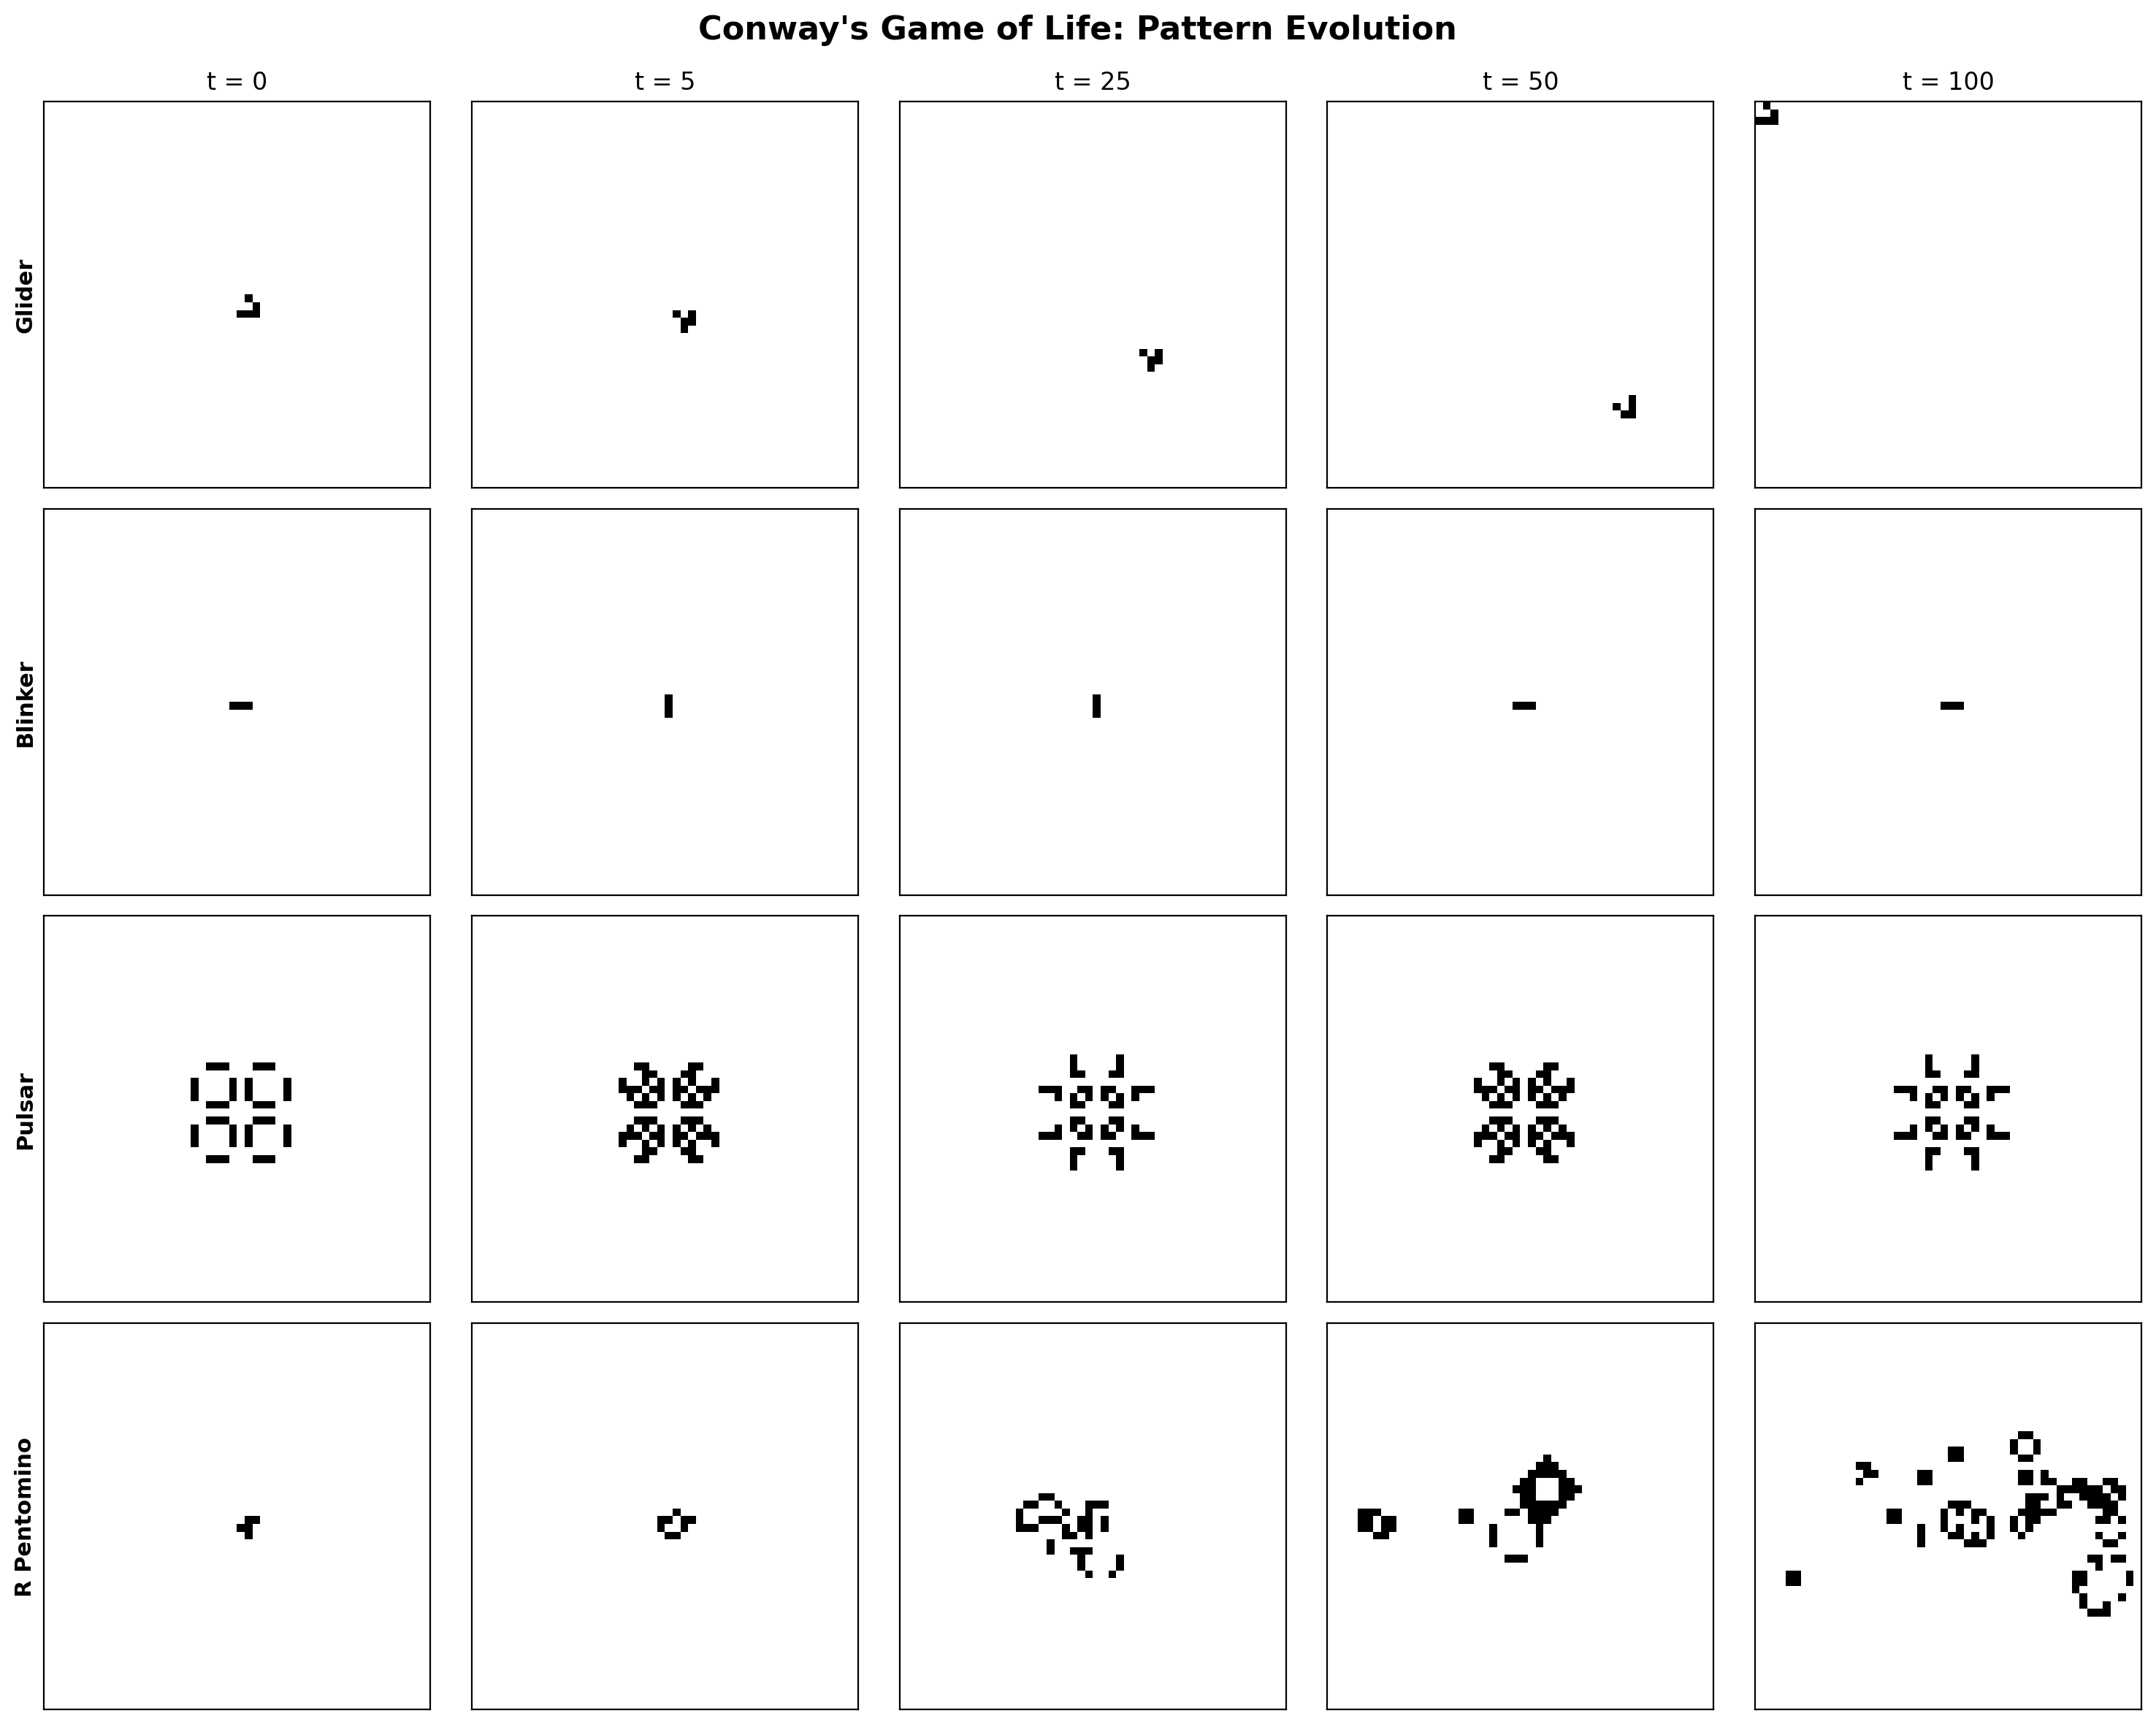


Visualization saved to 'plot.png'


In [5]:
# Create visualization showing evolution of patterns
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
fig.suptitle("Conway's Game of Life: Pattern Evolution", fontsize=16, fontweight='bold')

generations_to_show = [0, 5, 25, 50, 100]

for row, pattern in enumerate(patterns_to_show):
    history = results[pattern]
    
    for col, gen in enumerate(generations_to_show):
        ax = axes[row, col]
        ax.imshow(history[gen], cmap=cmap, interpolation='nearest')
        ax.set_xticks([])
        ax.set_yticks([])
        
        if row == 0:
            ax.set_title(f't = {gen}', fontsize=12)
        if col == 0:
            ax.set_ylabel(pattern.replace('_', ' ').title(), fontsize=11, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.savefig('cellular_automata_game_of_life_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nVisualization saved to 'plot.png'")

## Population Dynamics Analysis

Let's analyze how the population (number of live cells) evolves over time for different patterns.

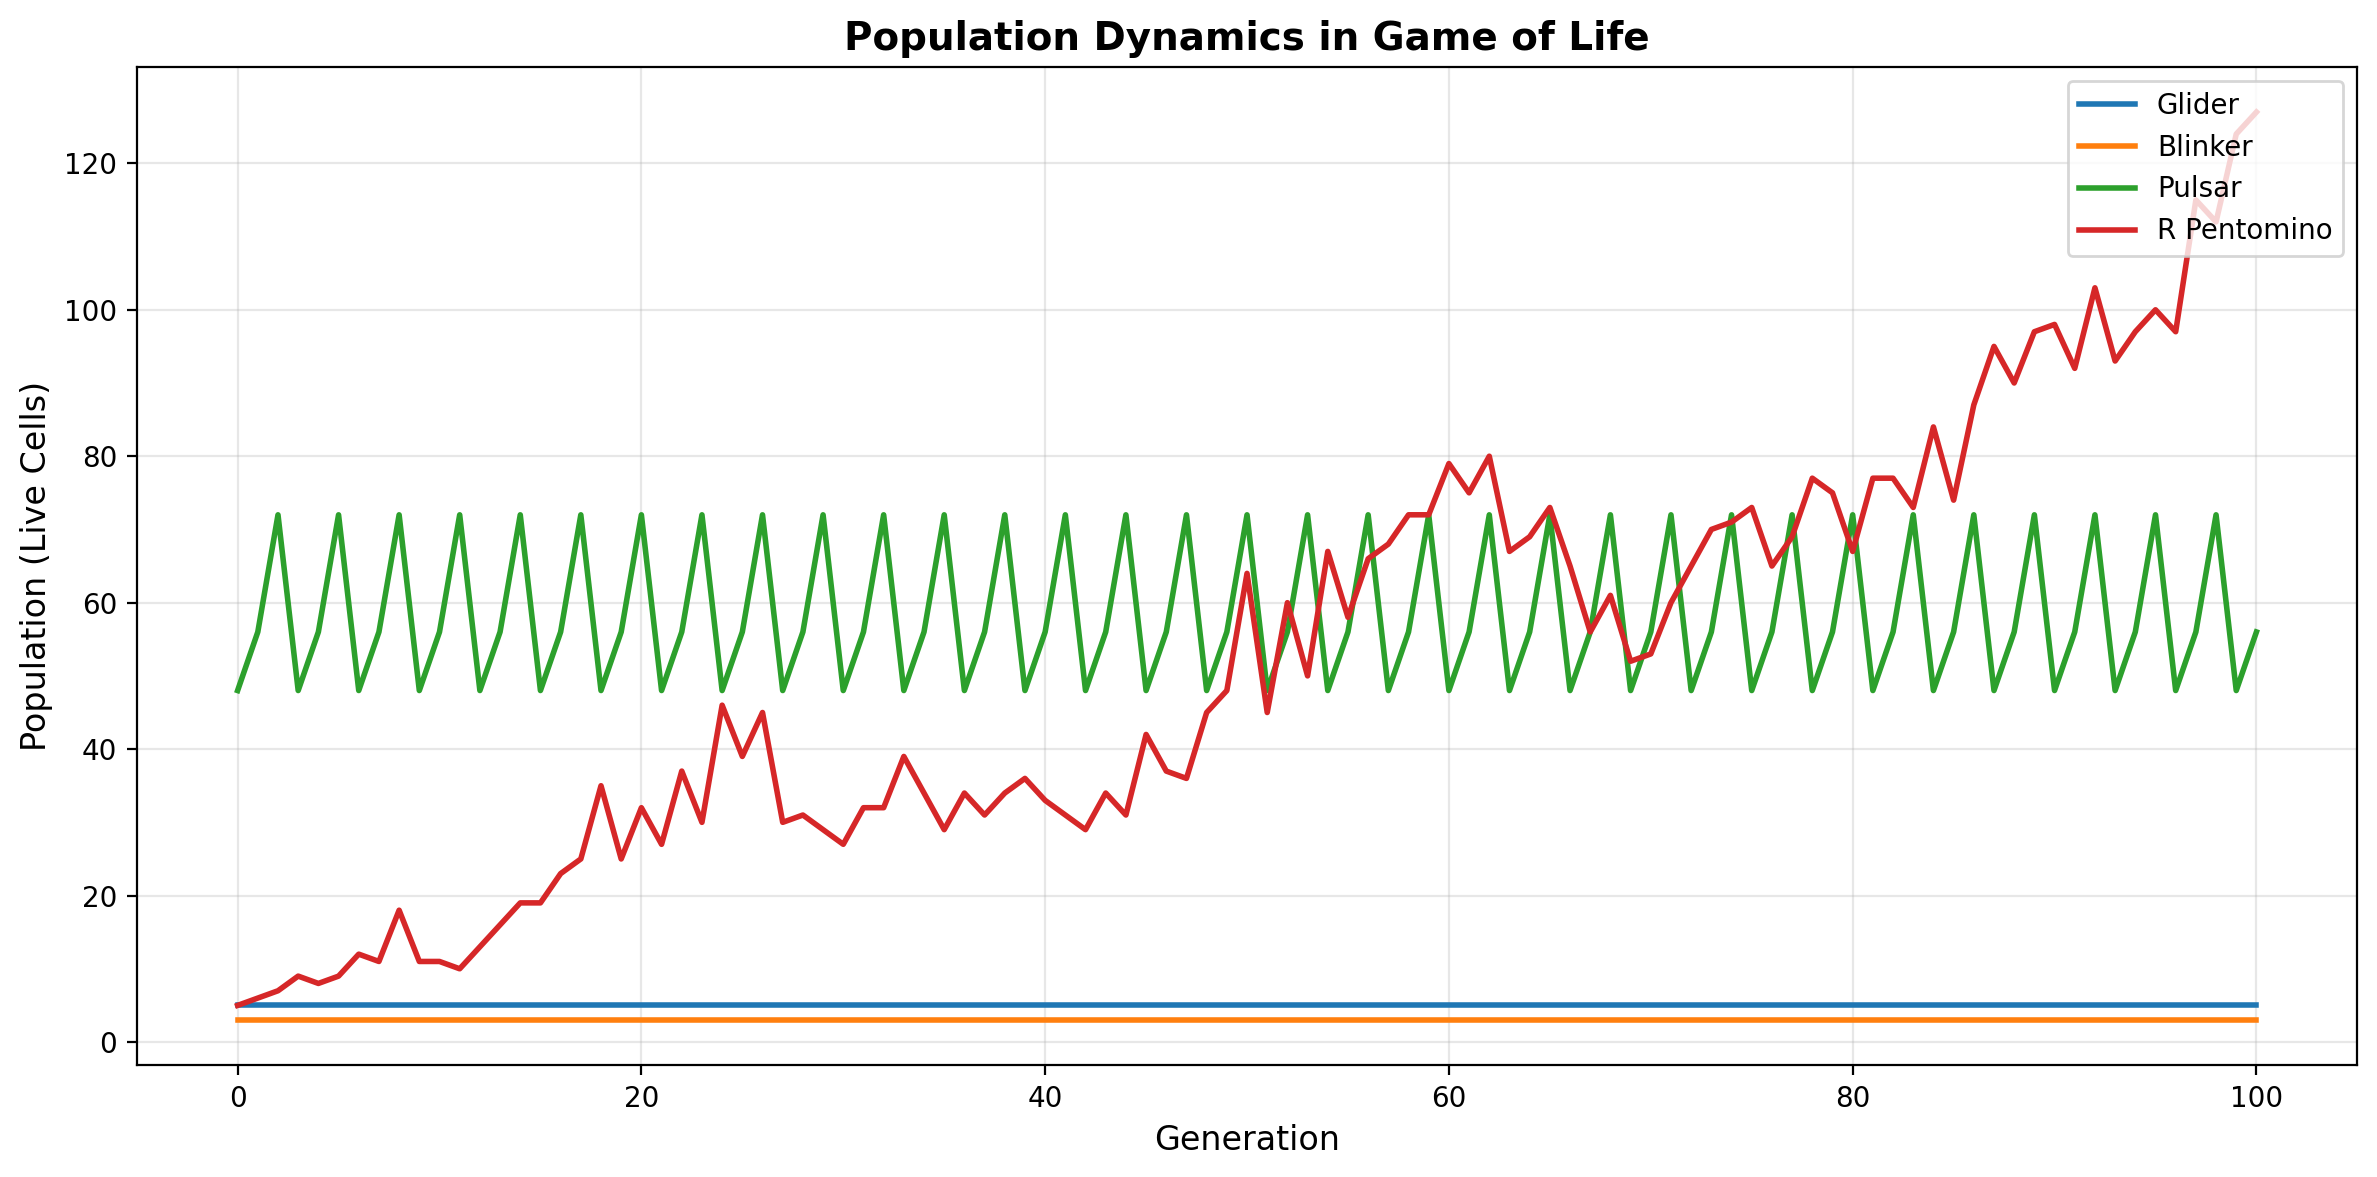

In [6]:
# Compute population over time for each pattern
fig, ax = plt.subplots(figsize=(12, 6))

for pattern in patterns_to_show:
    history = results[pattern]
    population = [grid.sum() for grid in history]
    ax.plot(population, label=pattern.replace('_', ' ').title(), linewidth=2)

ax.set_xlabel('Generation', fontsize=12)
ax.set_ylabel('Population (Live Cells)', fontsize=12)
ax.set_title('Population Dynamics in Game of Life', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Statistical Analysis

We can compute various statistics to characterize the behavior of different patterns.

In [7]:
def compute_statistics(history):
    """
    Compute statistical measures for a simulation history.
    
    Parameters
    ----------
    history : list
        List of grid states
        
    Returns
    -------
    dict
        Dictionary of statistics
    """
    populations = [grid.sum() for grid in history]
    
    return {
        'initial_pop': populations[0],
        'final_pop': populations[-1],
        'max_pop': max(populations),
        'min_pop': min(populations),
        'mean_pop': np.mean(populations),
        'std_pop': np.std(populations),
        'growth_factor': populations[-1] / populations[0] if populations[0] > 0 else 0
    }

# Compute and display statistics
print("Pattern Statistics (over 100 generations)")
print("=" * 70)
print(f"{'Pattern':<15} {'Initial':>8} {'Final':>8} {'Max':>8} {'Mean':>8} {'Std':>8} {'Growth':>8}")
print("-" * 70)

for pattern in patterns_to_show:
    stats = compute_statistics(results[pattern])
    print(f"{pattern:<15} {stats['initial_pop']:>8.0f} {stats['final_pop']:>8.0f} "
          f"{stats['max_pop']:>8.0f} {stats['mean_pop']:>8.1f} {stats['std_pop']:>8.1f} "
          f"{stats['growth_factor']:>8.2f}x")

Pattern Statistics (over 100 generations)
Pattern          Initial    Final      Max     Mean      Std   Growth
----------------------------------------------------------------------
glider                 5        5        5      5.0      0.0     1.00x
blinker                3        3        3      3.0      0.0     1.00x
pulsar                48       56       72     58.5      9.9     1.17x
r_pentomino            5      127      127     52.4     29.8    25.40x


## Entropy and Information Content

The spatial entropy $H$ of a configuration can measure the "randomness" or information content:

$$H = -p \log_2(p) - (1-p) \log_2(1-p)$$

where $p$ is the density of live cells (fraction of cells that are alive).

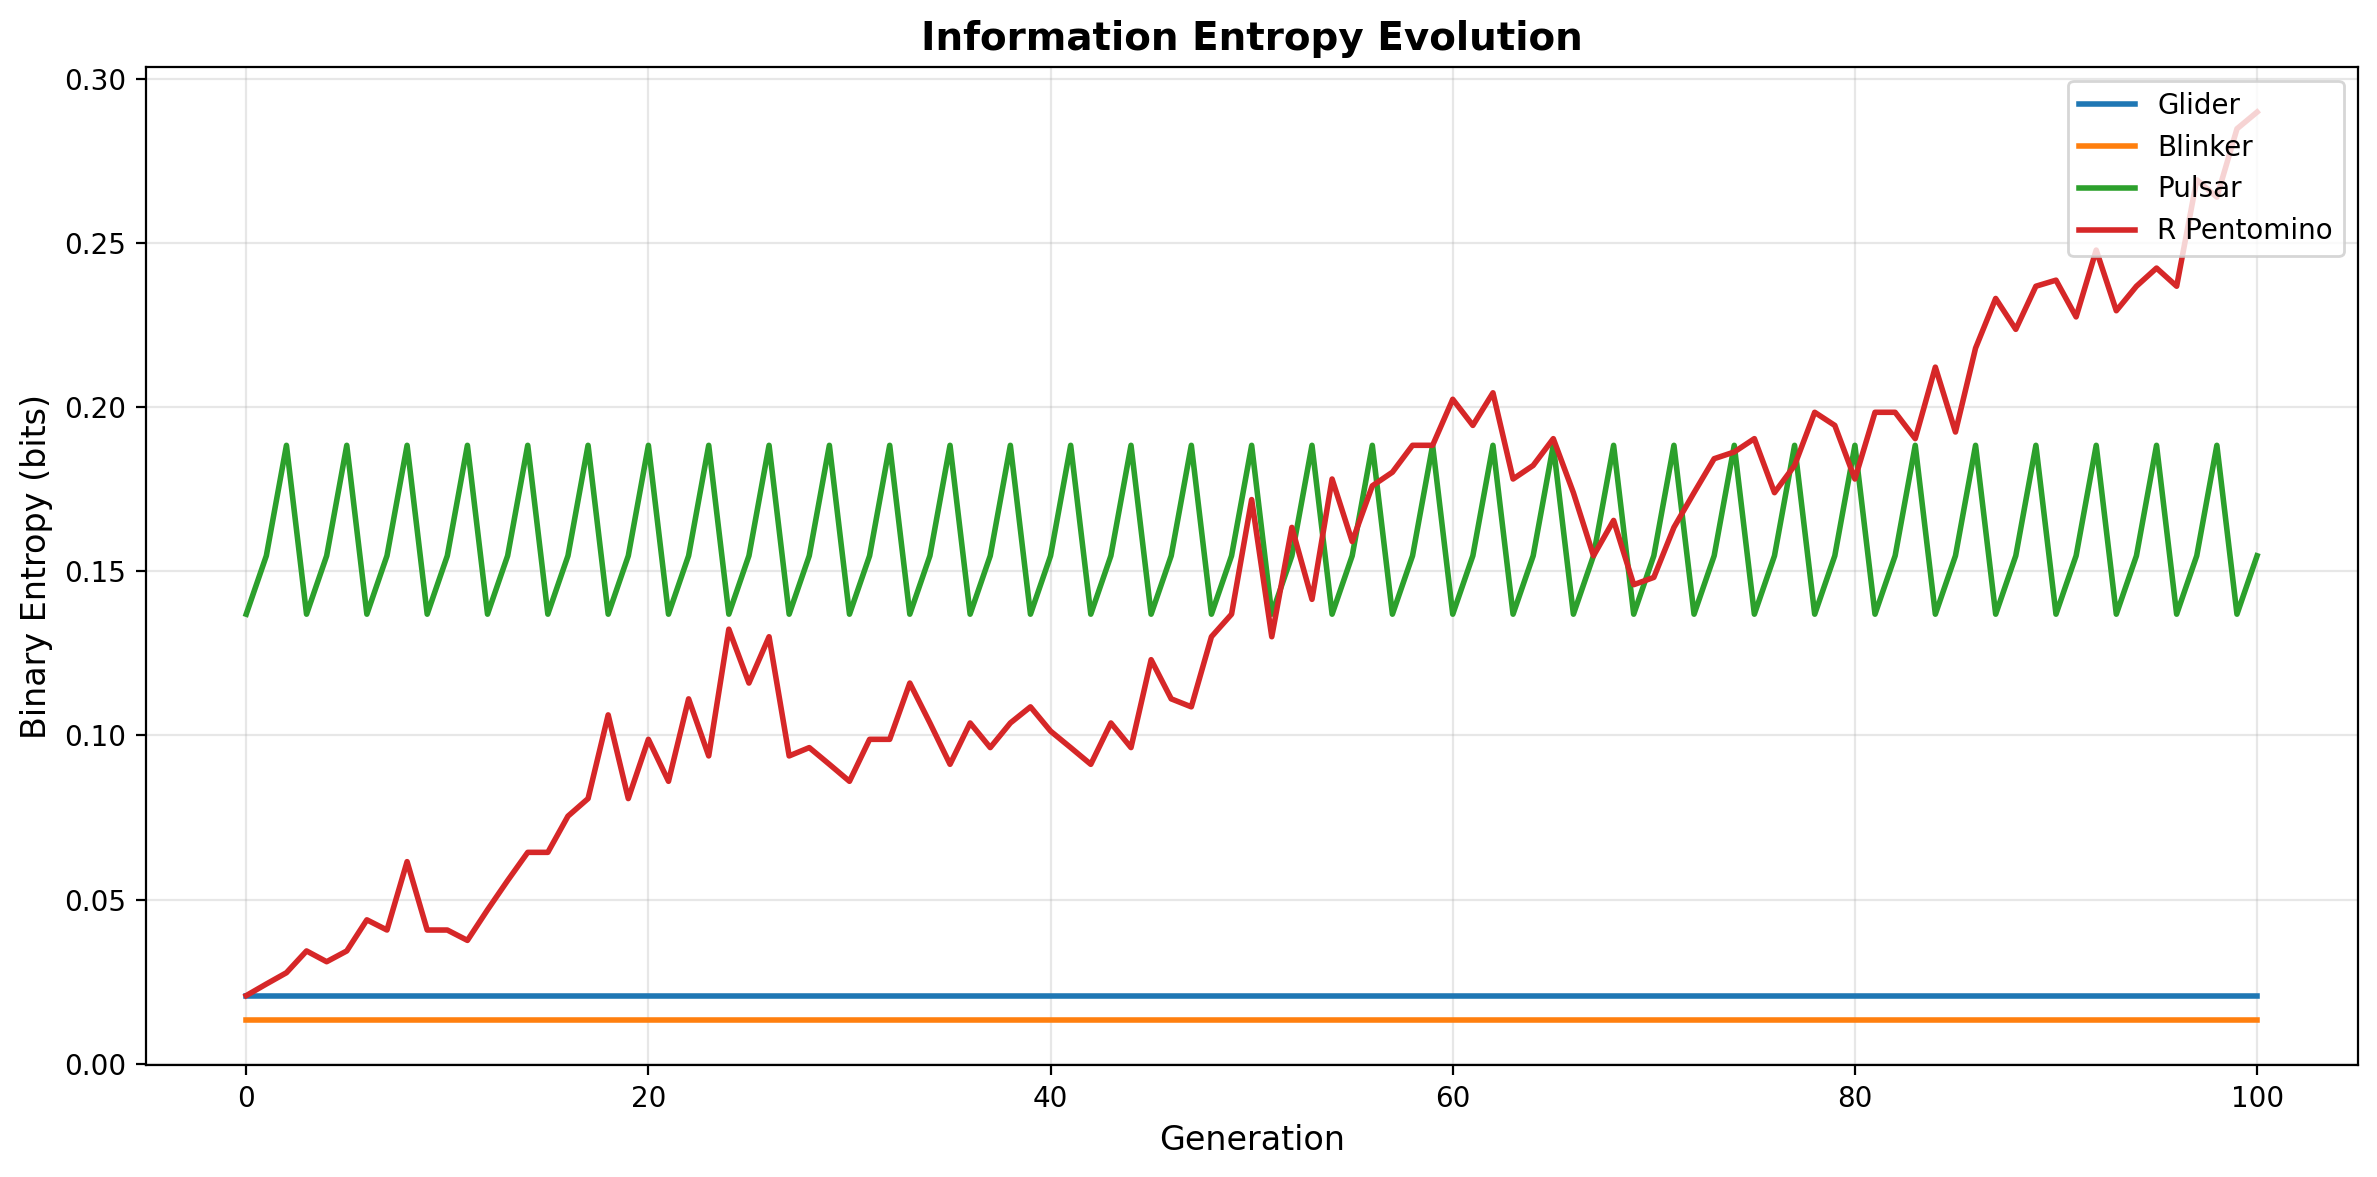

In [8]:
def compute_entropy(grid):
    """
    Compute the binary entropy of a grid configuration.
    
    Parameters
    ----------
    grid : ndarray
        Grid state
        
    Returns
    -------
    float
        Binary entropy value
    """
    p = grid.sum() / grid.size
    if p == 0 or p == 1:
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Plot entropy evolution
fig, ax = plt.subplots(figsize=(12, 6))

for pattern in patterns_to_show:
    history = results[pattern]
    entropy = [compute_entropy(grid) for grid in history]
    ax.plot(entropy, label=pattern.replace('_', ' ').title(), linewidth=2)

ax.set_xlabel('Generation', fontsize=12)
ax.set_ylabel('Binary Entropy (bits)', fontsize=12)
ax.set_title('Information Entropy Evolution', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Conclusions

This notebook demonstrated Conway's Game of Life, illustrating several key concepts:

1. **Emergent Complexity**: Simple local rules produce globally complex behavior
2. **Pattern Classification**: Different initial conditions lead to qualitatively different dynamics (still lifes, oscillators, spaceships, chaos)
3. **Computational Universality**: The Game of Life is Turing complete—it can simulate any computation
4. **Information Dynamics**: The entropy evolution reveals how information is created, preserved, or destroyed

The Game of Life serves as a paradigmatic example of how discrete dynamical systems can exhibit rich, unpredictable behavior from deterministic rules—a cornerstone concept in complexity science, artificial life, and theoretical computer science.